In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
fast = pd.read_csv('data/adapt_fast.csv')
slow = pd.read_csv('data/adapt_slow.csv')
slow

,size,pin,threads,runtime,usertime,energy
0,700,False,16,0.130564,2.042370,5.651414
1,700,False,16,0.129119,2.024624,5.657456
2,700,False,16,0.128739,2.023584,5.606553
3,700,False,16,0.129067,2.023718,5.598863
4,700,False,16,0.128859,2.023656,5.632370
...,...,...,...,...,...,...
1499,900,True,16,0.287944,4.534423,12.797574
1500,950,True,16,0.329431,5.197836,14.736352
1501,950,True,16,0.328939,5.174940,14.674034
1502,950,True,16,0.328553,5.190736,14.747948


In [17]:
def optimum(size, pin):
    if size == 500 and pin == True:
        return 15
    if size <= 1050:
        return 16
    if pin:
        return 8
    return 12

fast['optimum'] = fast.apply(lambda x: optimum(x['size'], x['pin']), axis=1)
slow['optimum'] = slow.apply(lambda x: optimum(x['size'], x['pin']), axis=1)

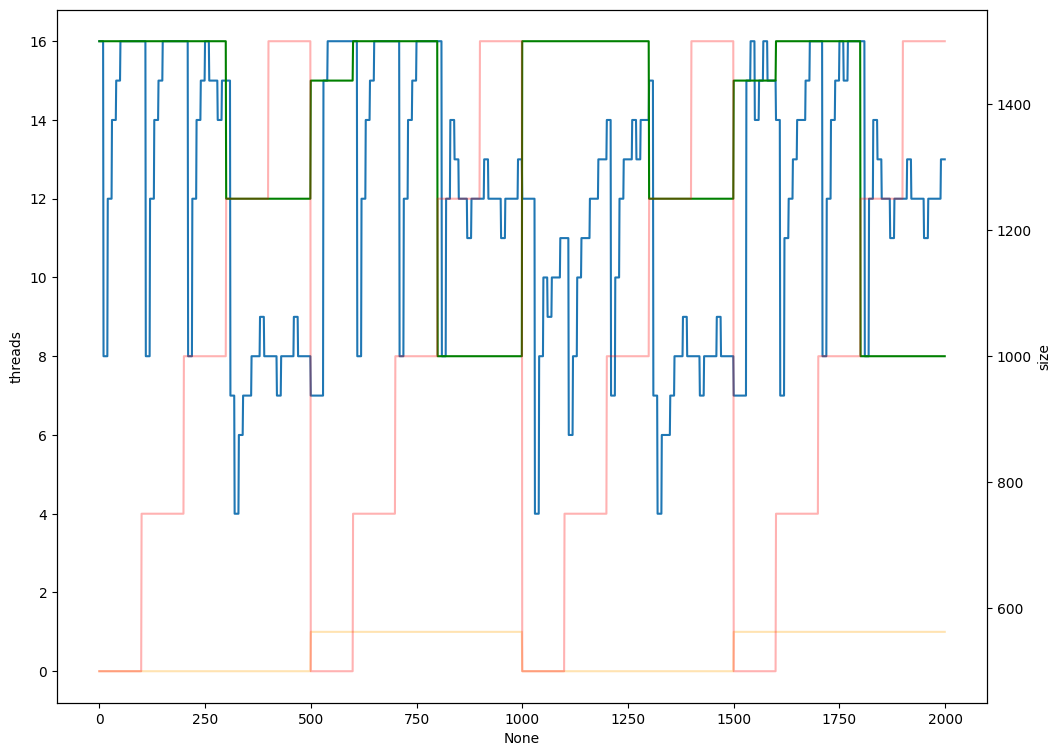

In [18]:
plt.figure(figsize=(12,9))

ax = sns.lineplot(fast, x=fast.index, y='threads')
sns.lineplot(fast, x=fast.index, y='optimum', color='g', ax=ax)

sns.lineplot(fast, x=fast.index, y='pin', color='orange', alpha=0.3, ax=ax)

ax2 = ax.twinx()

sns.lineplot(fast, x=fast.index, y='size', color='r', alpha=0.3, ax=ax2)

plt.savefig('images/adapt_fast.png')
plt.show()

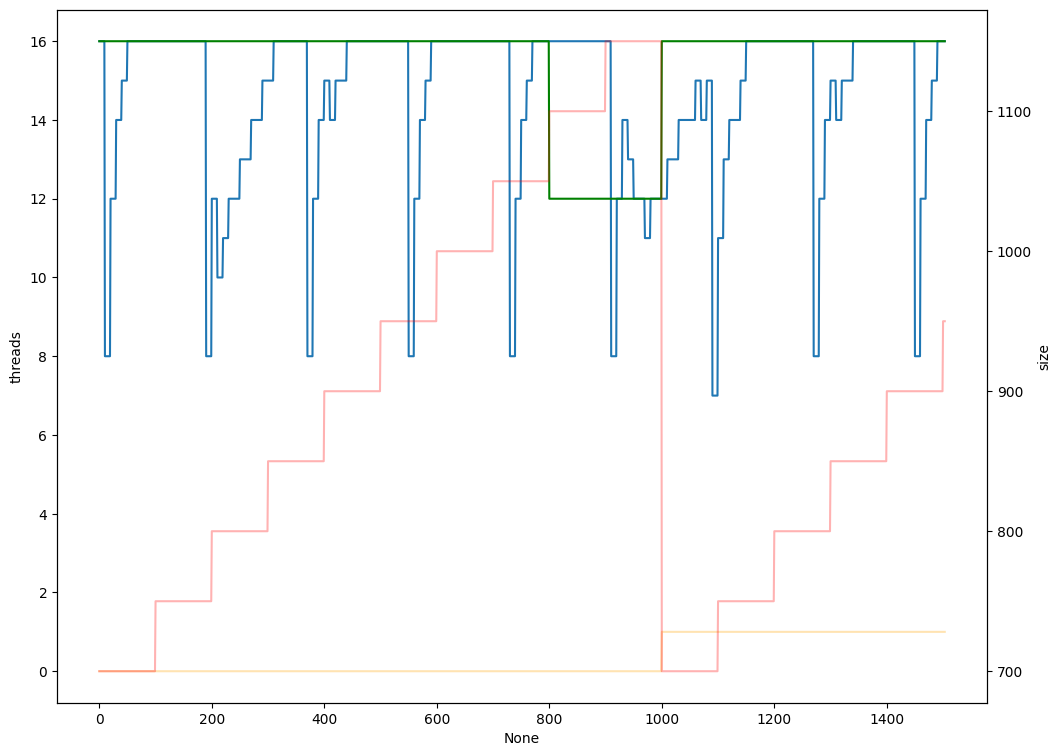

In [19]:
plt.figure(figsize=(12,9))

ax = sns.lineplot(slow, x=slow.index, y='threads')
sns.lineplot(slow, x=slow.index, y='optimum', color='g', ax=ax)

sns.lineplot(slow, x=slow.index, y='pin', color='orange', alpha=0.3, ax=ax)

ax2 = ax.twinx()

sns.lineplot(slow, x=slow.index, y='size', color='r', alpha=0.3, ax=ax2)

plt.savefig('images/adapt_slow.png')
plt.show()